In [21]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score

NAME = "desert-vs-forest-cnn-64x2-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs\\{}'.format(NAME), histogram_freq=1)

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

training_X = pickle.load(open("NatureX_Training.pickle", "rb"));
training_y = pickle.load(open("Naturey_Training.pickle", "rb"));

training_X = training_X/255.0

test_X = pickle.load(open("NatureX_Test.pickle", "rb"));
test_y = pickle.load(open("Naturey_Test.pickle", "rb"));

test_X = test_X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = training_X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # converts the 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

#%load_ext tensorboard
#%tensorboard --logdir=logs\\ --host localhost --port 6006

history = model.fit(training_X, training_y, batch_size=32, epochs=3, validation_split=0.2) #, callbacks=[tensorboard])

Train on 5040 samples, validate on 1260 samples
Epoch 1/3
5040/5040 [==============================] - 80s 16ms/sample - loss: 0.2590 - acc: 0.8929 - val_loss: 0.1977 - val_acc: 0.9333
Epoch 2/3
5040/5040 [==============================] - 75s 15ms/sample - loss: 0.2008 - acc: 0.9183 - val_loss: 0.1897 - val_acc: 0.9262
Epoch 3/3
5040/5040 [==============================] - 77s 15ms/sample - loss: 0.1591 - acc: 0.9381 - val_loss: 0.1513 - val_acc: 0.9476


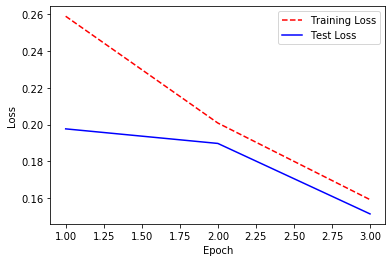

1482/1482 [==============================] - 6s 4ms/sample - loss: 0.1463 - acc: 0.9480


[0.14628274807161004, 0.94804317]

In [22]:
# Get training and test loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

model.evaluate(test_X, test_y, batch_size=32)

In [25]:
pred_y = model.predict_classes(test_X, batch_size=32)

matrix = confusion_matrix(test_y, pred_y)
print(matrix)

[[668  34]
 [ 43 737]]


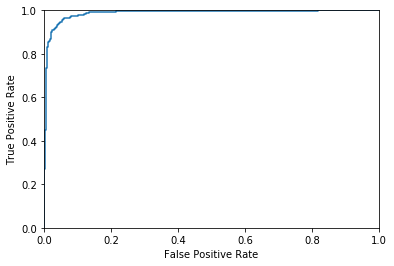

0.9869219811527503


In [26]:
pred_y_proba = model.predict_proba(test_X, batch_size=32)
fpr , tpr , thresholds = roc_curve (test_y , pred_y_proba)

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
plot_roc_curve (fpr,tpr)

auc = auc_score=roc_auc_score(test_y , pred_y_proba) 
print(auc)